<center>
    <hr> 
    <h1> 6º algoritimo: Classificação de Realização de Projeto: </h1>
    <br>
    <hr> 
    <h2> Objetivo: A partir de 2 informações relacionadas ao projeto (horas demandadas e orçamento), criar um algoritimo que classifique o projeto como realizado ou não </h2>
    <br>
    <I> Feito por Yasmin Miranda </I>
    <hr> 
</center>

<center>
    <font size = "4" color = "#003666"> <B> Importando bibliotecas necessárias: </B> </font> 
</center>

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<center>
<font size = "4" color = "#003666"> <B> Criando a base de dados: </B> </font> 
</center>

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()
#ultimas 2 colunas são features e primeira é a variavel resposta
#coluna1: se o projeto não foi finalizado
#coluna2: expectativa de horas necessarias para realizar esse projeto
#coluna3: preço que cliente está disposto a pagar por esse projeto

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
dados.shape

(2157, 3)

In [4]:
#traduzir colunas para portugues
mapa = {
    "unfinished":"nao_finalizado",
    "expected_hours":"horas_demandadas",
    "price":"orcamento",
}
dados = dados.rename(columns=mapa)

In [5]:
#trabalhar com projetos finalizados:
troca = {
    0 :1,
    1:0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_demandadas,orcamento,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<center>
<font size = "4" color = "#003666"> <B> Visualizando dados: </B> </font> 
</center>

<AxesSubplot:xlabel='horas_demandadas', ylabel='orcamento'>

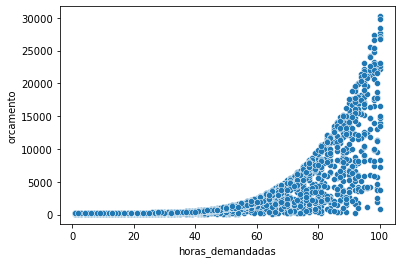

In [6]:
sns.scatterplot(x="horas_demandadas",y="orcamento",data=dados)

<AxesSubplot:xlabel='horas_demandadas', ylabel='orcamento'>

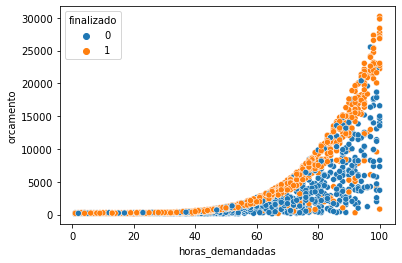

In [7]:
sns.scatterplot(x="horas_demandadas",y="orcamento",hue="finalizado",data=dados)

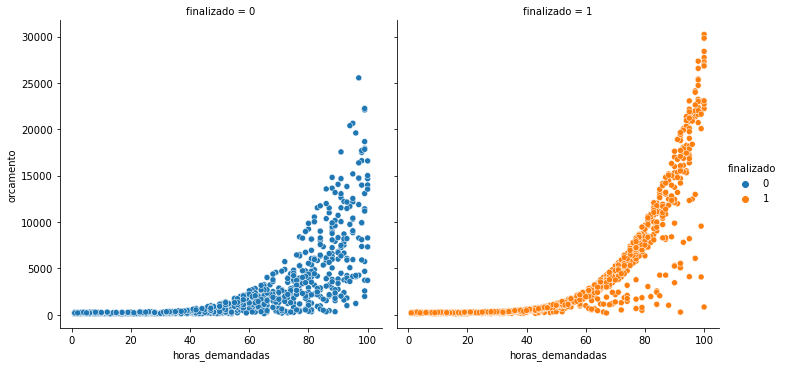

In [8]:
sns.relplot(x="horas_demandadas",y="orcamento",hue="finalizado",col="finalizado",data=dados)

In [9]:
x = dados[['horas_demandadas','orcamento']]
y = dados['finalizado']

In [10]:
SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(
    x,y,random_state=SEED,stratify=y,test_size=0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


<center>
<font size = "4" color = "#003666"> <B> Criando algoritmo: </B> </font> 
</center>

In [11]:
modelo = LinearSVC() 
modelo.fit(treino_x,treino_y)

C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

<center>
<font size = "4" color = "#003666"> <B> Testando algoritmo: </B> </font> 
</center>

In [12]:
previsoes = modelo.predict(teste_x)
previsoes[:5] #previsao de compra para primeiros 5 visitantes do conj teste

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
teste_y[:5]

499     0
1149    1
870     1
1617    0
1896    1
Name: finalizado, dtype: int64

<center>
<font size = "4" color = "#003666"> <B> Validando algoritmo: </B> </font> 
</center>

In [14]:
acuracia = accuracy_score(teste_y, previsoes)
print("Acurácia do Algoritmo: %.2f%%" % (acuracia*100))

Acurácia do Algoritmo: 52.41%


In [15]:
#previsoes considerando que todos os projetos seriam finalizados
previsoes_base = np.ones(len(teste_x))
acuracia = accuracy_score(teste_y,previsoes_base)
print("Acurácia Base: %.2f%%" % (acuracia*100))

Acurácia Base: 52.59%


Necessário melhorar o algoritmo!

<center>
<font size = "4" color = "#003666"> <B> Buscando Melhorias: </B> </font> 
</center>

<AxesSubplot:xlabel='horas_demandadas', ylabel='orcamento'>

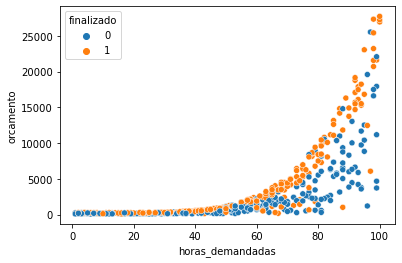

In [16]:
#avaliar se dados de teste estao muito diferentes do treinamento
sns.scatterplot(x="horas_demandadas",y="orcamento",hue=teste_y,data=teste_x)

In [17]:
y_min=teste_x.orcamento.min()
x_min=teste_x.horas_demandadas.min()
y_max=teste_x.orcamento.max()
x_max=teste_x.horas_demandadas.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [18]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx,yy=np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

In [19]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

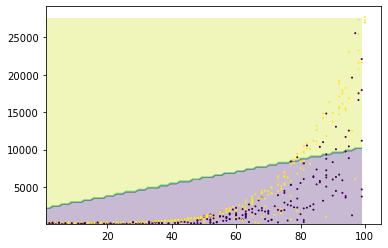

In [20]:
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(teste_x.horas_demandadas,teste_x.orcamento, c=teste_y,s=1)

Valores de (horas_demandadas, orcamento) abaixo da curva de decisão (reta verde escura), na área roxa, serão classificados como 0 (projeto não finalizado) e acima, na área amarelada, serão classificados como 1 (projeto finalizado). Vemos, então, como a curva de decisão está mal ajustada. Uma maneira de contornar essa situação seria assumir uma curva logaritmica ao invés de uma linear.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


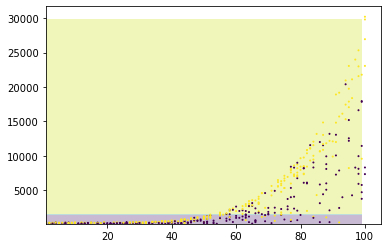

In [24]:
x_min = teste_x.horas_demandadas.min()
x_max = teste_x.horas_demandadas.max()
y_min = teste_x.orcamento.min()
y_max = teste_x.orcamento.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_demandadas, teste_x.orcamento, c=teste_y, s=1)

# DECISION BOUNDARY

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


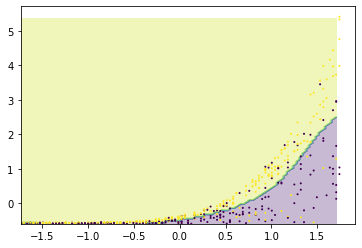

In [26]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY

vemos que ao mudar a escalar de ambas as variaveis e utilizar uma curva de decisão o algoritmo performa melhor